In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Using sikit, importing libraries to train the model and scaling
from sklearn.model_selection import train_test_split #For training and testing
from sklearn import preprocessing                    #Preprocessing dataset
from sklearn.preprocessing import StandardScaler     #Scaling model
from sklearn.pipeline import Pipeline                #Model selection
from sklearn.model_selection import cross_val_score  #For cross evaluating accuracy scores
#loading classifier libraries for dataset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Using sklearn, importing libraries for metrics
from sklearn import metrics

In [4]:
#Importing csv. use df as command
df = pd.read_csv("/content/fetal_health.csv")

In [5]:
#Reading data head to get an overview on dataset
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
#Getting more information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
#use describe to find out the features description and understanding the dispersion of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
#Taking random samples from the dataset
df.sample(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
691,133.0,0.007,0.455,0.003,0.003,0.0,0.0,25.0,1.7,0.0,...,68.0,174.0,7.0,1.0,143.0,132.0,138.0,41.0,0.0,1.0
522,158.0,0.008,0.027,0.002,0.000,0.0,0.0,41.0,0.9,0.0,...,151.0,198.0,4.0,0.0,186.0,178.0,180.0,15.0,0.0,1.0
1697,137.0,0.009,0.001,0.005,0.003,0.0,0.0,58.0,1.5,0.0,...,69.0,178.0,2.0,0.0,146.0,143.0,150.0,52.0,1.0,1.0
187,138.0,0.001,0.000,0.004,0.000,0.0,0.0,43.0,1.1,20.0,...,129.0,173.0,8.0,2.0,162.0,155.0,159.0,8.0,1.0,2.0
127,159.0,0.000,0.000,0.003,0.000,0.0,0.0,62.0,0.5,6.0,...,81.0,172.0,0.0,0.0,163.0,163.0,164.0,2.0,1.0,2.0
705,133.0,0.000,0.000,0.007,0.000,0.0,0.0,60.0,0.7,58.0,...,72.0,200.0,8.0,1.0,133.0,132.0,134.0,2.0,0.0,2.0
1835,140.0,0.000,0.003,0.003,0.008,0.0,0.0,60.0,1.8,0.0,...,52.0,159.0,7.0,0.0,142.0,124.0,141.0,34.0,1.0,1.0
418,137.0,0.000,0.000,0.000,0.000,0.0,0.0,74.0,0.3,71.0,...,135.0,148.0,1.0,0.0,140.0,141.0,142.0,1.0,0.0,3.0
210,125.0,0.008,0.015,0.001,0.000,0.0,0.0,48.0,0.8,0.0,...,82.0,145.0,9.0,0.0,133.0,132.0,133.0,3.0,1.0,1.0
842,138.0,0.000,0.000,0.004,0.000,0.0,0.0,42.0,0.7,48.0,...,113.0,152.0,2.0,0.0,141.0,139.0,142.0,1.0,1.0,1.0


Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, alowing healthcare professionals to take action in order to prevent child and maternal mortality. 

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
1. Normal
2. Suspect
3. Pathological

From the columns represented: 
baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute)

accelerations: Number of accelerations per second

fetal_movement: Number of fetal movements per second

uterine_contractions: Number of uterine contractions per second

light_decelerations: Number of light decelerations (LDs) per second

severe_decelerations: Number of severe decelerations (SDs) per second

prolongued_decelerations: Number of prolonged decelerations (PDs) per second

abnormal_short_term_variability: Percentage of time with abnormal short term variability

mean_value_of_short_term_variability: Mean value of short term variability

percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability

mean_value_of_long_term_variability: Mean value of long term variability

histogram_width: Width of histogram made using all values from a record

histogram_min: Histogram minimum value

histogram_max: Histogram maximum value

histogram_number_of_peaks: Number of peaks in the exam histogram

histogram_number_of_zeroes: Number of zeros in the exam histogram

histogram_mode: Histogram mode

histogram_mean: Histogram mean

histogram_median: Histogram median

histogram_variance: Histogram variance

histogram_tendency: Histogram tendency

fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological.

####Based on df.info, there are 2126 entries across 22 features with 0 missing values; Dtype of all features are float 64

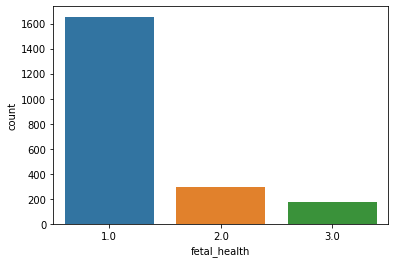

In [9]:
#using matplotlib to evaluate and find out if the data is imbalanced data based on the fetal_health feature
sns.countplot(data= df, x="fetal_health")

The count plot of target indicates an imbalance in the dataset. This will provide misleading classificaiton accuracy.

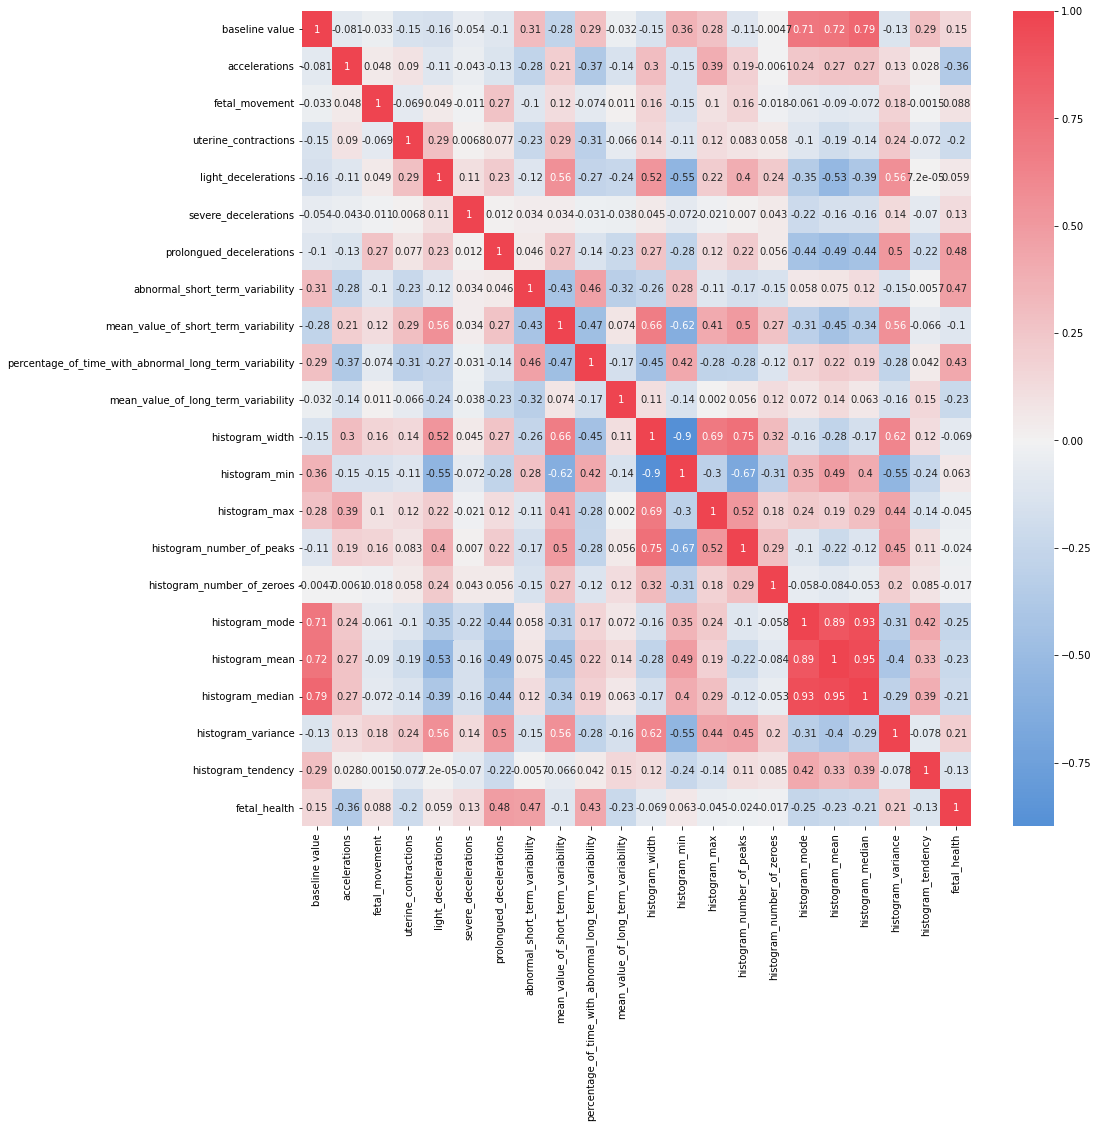

In [10]:
#Plotting correlation matrix
corrmat = df.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

Since the aim of this dataset (Cardiotocography) is to predict child and maternal mortality, fetal_health will be used as the target feature (y).

From the correlation table, I can see that acceleration, prolongued deceleration, abnormal short term variability and precentage of time with abnormal long term variability has the largest coefficient with fetal health.

accelerations has a -0.36 correlation with fetal_health

prolonged_decelerations has a 0.48 correlation with fetal_health

abnormal_short_term_variability has a 0.47 corelation with fetal_health

percentage_of_time_with_abnormal_long_term_variability has a 0.43 correlation with fetal_health

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


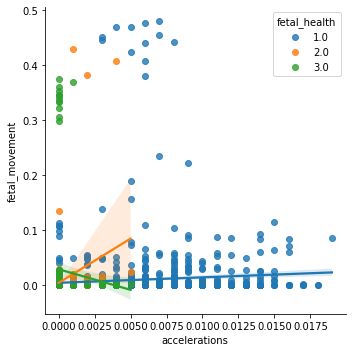

In [11]:
#Plotting a scatter plot to show a clearer picture to show the trends between Accelerations and Fetal Movemnet
#Which is related to Fetal Health.
sns.lmplot(data =df,x="accelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


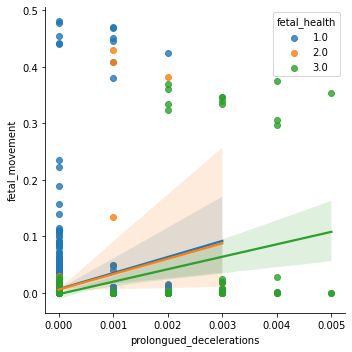

In [12]:
#Plotting a scatter plot to show a clearer picture to show the trends between Prolongued Deceleration and Fetal Movemnet
#Which is related to Fetal Health.
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


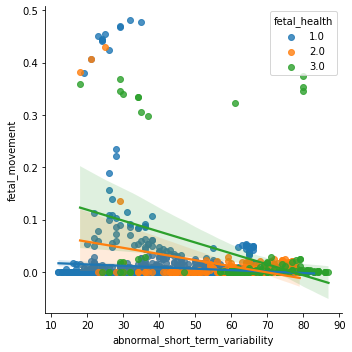

In [13]:
#Plotting a scatter plot to show a clearer picture to show the trends between abnormal short term variability and Fetal Movemnet
#Which is related to Fetal Health.
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


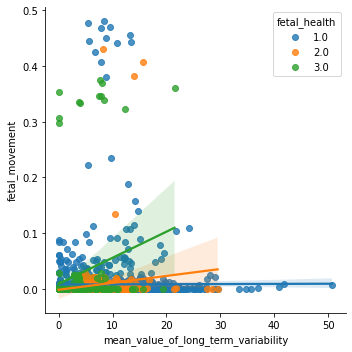

In [14]:
#Plotting a scatter plot to show a clearer picture to show the trends between Mean value of long term variability and Fetal Movemnet
#Which is related to Fetal Health.
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

With accelerations vs fetal movement, higher fetal movement with lower accelerations will trend towards abnormal fetal health; with normal fetal health trending towards a gradual acceleration.

With prolongued decelerations vs Fetal movement, the longer the prolongued deceleration, the trend of abnormal fetal health can be seen.

With Abnormal short term variability vs Fetal movement, higher fetal movement during high percentage of abnormal short term variability will trend towards a abnormal fetal health.

With mean value of long term variability vs Fetal Movement, the faster the fetal movement over a greater mean value of long term variability, the trend of abnormal fetal health can be seen.

The graphs shows the rate of change with each graph showing a specific trend. The outliers are also clearly shown. The outliers may be a measurement error or data entry error but since the dataset is the outcome of a CTG report, it is assumed that it is unlikely to be a data entry error. 

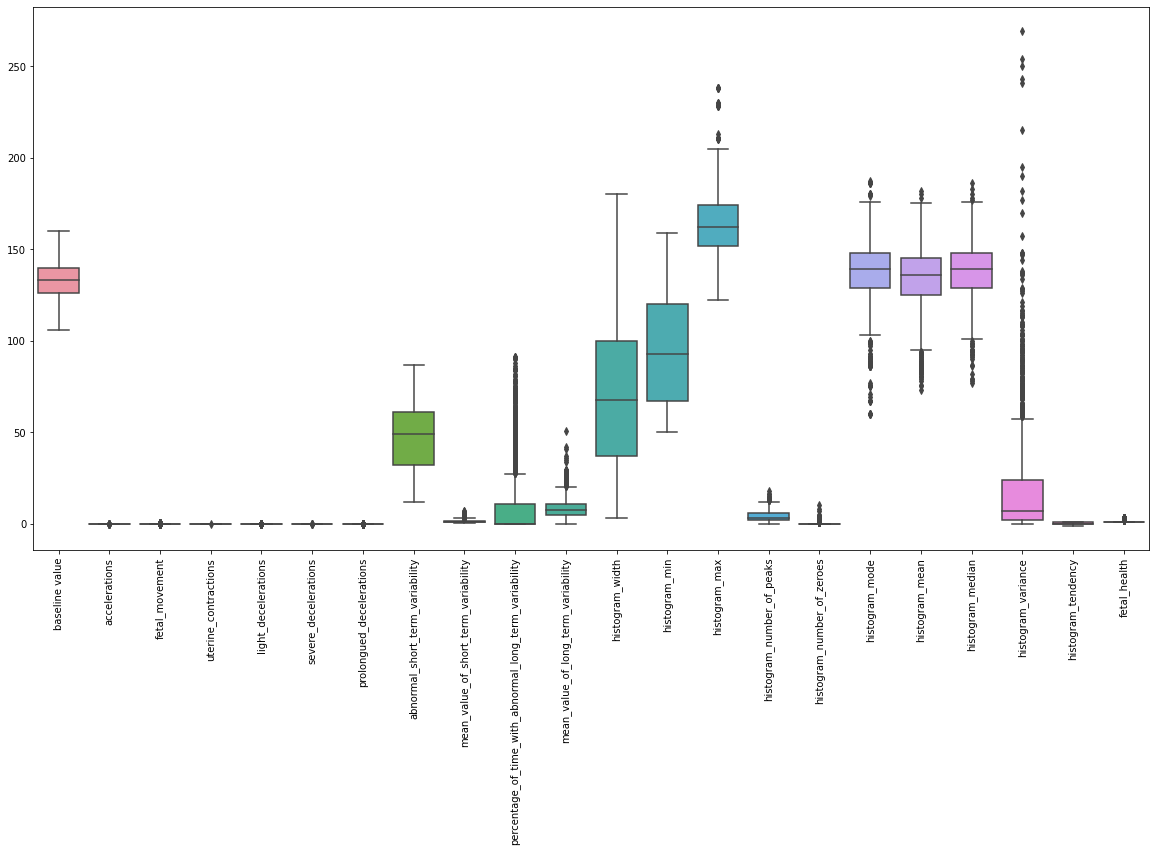

In [15]:
#Using a Box plot to visualize the range of the feature attributes. Since all the features have different range, Scaling is required.
plt.figure(figsize=(20,10))
sns.boxplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [16]:
#Defining values to features as X and target as Y
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

In [17]:
#Standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scale = s_scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=col_names)
X_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


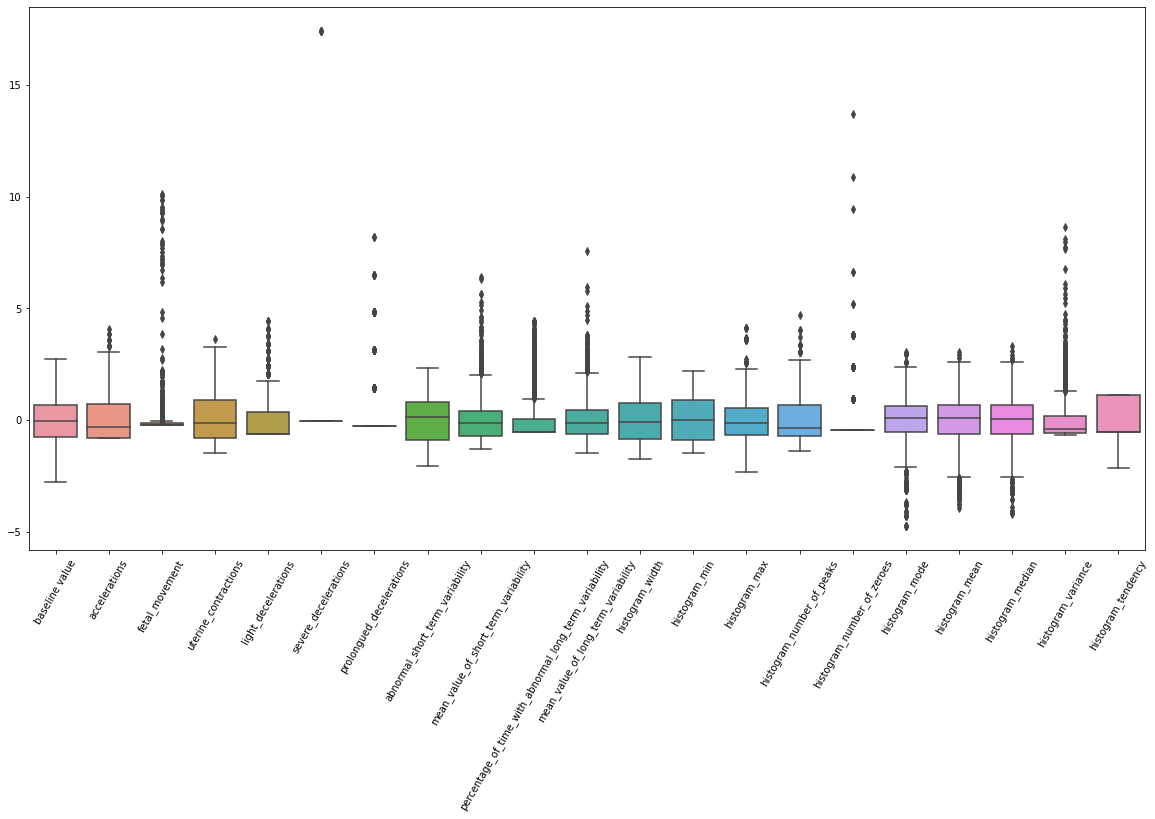

In [18]:
#Plotting boxplot with the scaled features
plt.figure(figsize=(20,10))
sns.boxplot(data = X_scale)
plt.xticks(rotation=60)
plt.show()

The new plot indicated that all the feaures are in the same range since scaling has been done. Outliers can be spotted in a few features. Since this is from a CTG report, assuming that the outliers are not caused by typo or measurement errors, I cannot drop or remove the data from the model as it will lead to a loss of information

In [19]:
#Splitting the training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3, random_state=42)

In [20]:
#Making use of pipelines for various classifier ref:https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_knn = Pipeline([('knn_classifier', KNeighborsClassifier())])
#listing all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn]
#Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN'}
#Fitting the pipelines
for pipe in pipelines:
  pipe.fit(X_train, y_train)


In [21]:
#Validation on accuracy
results_accuracy = []
for i, model in enumerate(pipelines):
  score = cross_val_score(model, X_train, y_train, cv=12)
  results_accuracy.append(score)
  print("%s: %f " % (pipe_dict[i], score.mean()))

Logistic Regression: 0.894489 
Decision Tree: 0.917339 
Random Forest: 0.940188 
KNN: 0.893145 


Based on the test scores, Random Forest has the best score amongst the 4 classifier used and is the most accurate, while KNN and Logistic Regression score the lowest.

In [22]:
#Importing testing library from sklearn
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
#Test set random forest
predict_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, predict_rfc)
print(accuracy) #Test score

0.9357366771159875


In [23]:
#Confusion Matrix RandomForest
print("Confusion Matrix :")
print(confusion_matrix(y_test, predict_rfc))

Confusion Matrix :
[[484   9   3]
 [ 22  76   3]
 [  2   2  37]]


With the testing data, the accuracy test score with random forest is shown above. 

Conclusion: Using multiple classification techniques, Random Forest Classifier has the highest accuracy score of 0.94, using this classifier we can use it to look for how different features can be used to find out if the fetal health is within normal range. This will then be used to predict child and maternal mortality. 

References

Random Forest Classifier, 

Box Plot, 

Decision Tree Classifier,

Logistic Regression Classifier,

KNeighbors Classifier,

Correlation Matrix, 